In [2]:
# 統計データ解析で使うパッケージ（モジュール）一覧
import pandas as pd # pandas:表（行列型＝構造化データ）データのハンドリングに特化
import numpy as np # 数値計算に特化
from scipy import stats,integrate #　確率関連と積分計算
import statsmodels.formula.api as smf #　回帰分析で使う
import statsmodels.api as sm # 統計解析全般
from matplotlib import pyplot as plt #　可視化

MA(1)過程

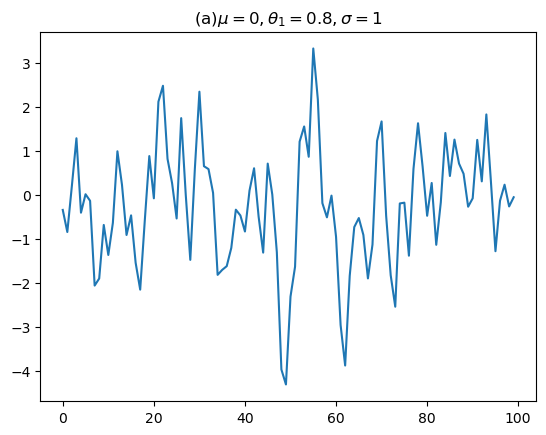

In [3]:
rv = stats.norm(0,1)
e_t = rv.rvs(10000)
mu=0
sigma=1
theta_1=0.8
y_t_a=mu+sigma*e_t[1:]+theta_1*e_t[0:-1]
plt.plot(y_t_a[0:100])
plt.title("(a)$\mu=0,\\theta_1=0.8,\sigma=1$")
plt.show()

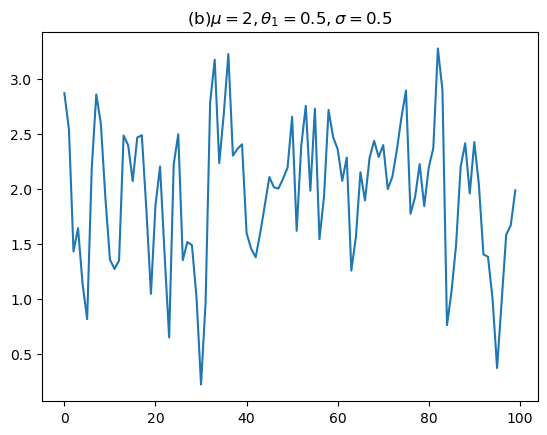

In [5]:
rv = stats.norm(0,1)
e_t = rv.rvs(10000)
mu=2
sigma=0.5
theta_1=0.5
y_t_a=mu+sigma*e_t[1:]+theta_1*e_t[0:-1]
plt.plot(y_t_a[0:100])
plt.title("(b)$\mu=2,\\theta_1=0.5,\sigma=0.5$")
plt.show()

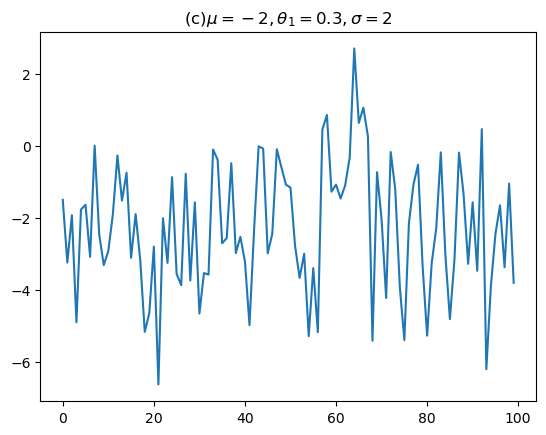

In [6]:
rv = stats.norm(0,1)
e_t = rv.rvs(10000)
mu=-2
sigma=2
theta_1=0.3
y_t_a=mu+sigma*e_t[1:]+theta_1*e_t[0:-1]
plt.plot(y_t_a[0:100])
plt.title("(c)$\mu=-2,\\theta_1=0.3,\sigma=2$")
plt.show()

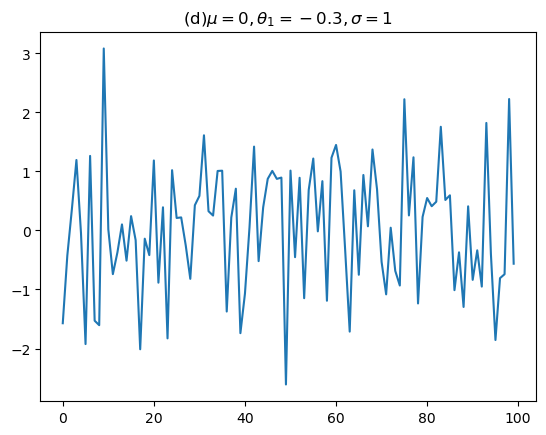

In [7]:
rv = stats.norm(0,1)
e_t = rv.rvs(10000)
mu=0
sigma=1
theta_1=-0.3
y_t_a=mu+sigma*e_t[1:]+theta_1*e_t[0:-1]
plt.plot(y_t_a[0:100])
plt.title("(d)$\mu=0,\\theta_1=-0.3,\sigma=1$")
plt.show()

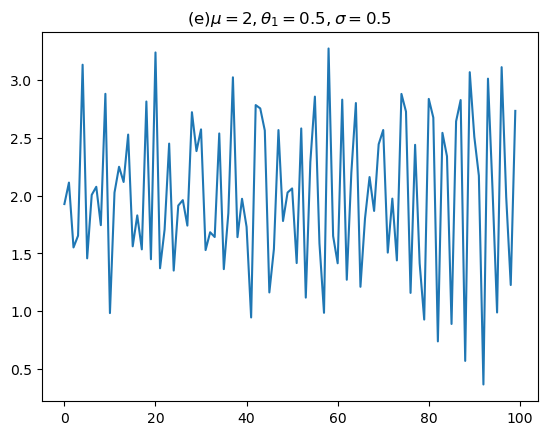

In [8]:
rv = stats.norm(0,1)
e_t = rv.rvs(10000)
mu=2
sigma=0.5
theta_1=-0.5
y_t_a=mu+sigma*e_t[1:]+theta_1*e_t[0:-1]
plt.plot(y_t_a[0:100])
plt.title("(e)$\mu=2,\\theta_1=0.5,\sigma=0.5$")
plt.show()

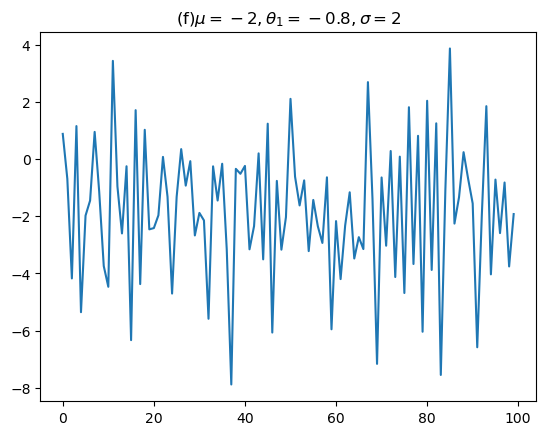

In [9]:
rv = stats.norm(0,1)
e_t = rv.rvs(10000)
mu=-2
sigma=2
theta_1=-0.8
y_t_a=mu+sigma*e_t[1:]+theta_1*e_t[0:-1]
plt.plot(y_t_a[0:100])
plt.title("(f)$\mu=-2,\\theta_1=-0.8,\sigma=2$")
plt.show()

コレログラム

In [12]:
# コレログラムの作成
y_t_a[1:5],mu+e_t[1:5]+theta_1*e_t[0:4]


(array([-0.69180734, -4.17737296,  1.15311506, -5.35852993]),
 array([-1.04088189, -2.11432714, -3.6576944 , -0.21557104]))

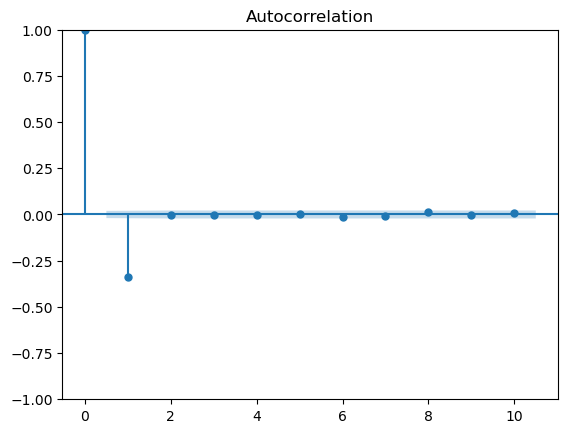

In [13]:
sm.graphics.tsa.plot_acf(y_t_a,lags=10) #データ、ラグ40
plt.show() #　塗りつぶされた領域は採択領域